In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [ ]:
X = df[['MedInc', 'AveRooms', 'HouseAge', 'AveOccup']].values   # independent vars
y = df['MedHouseVal'].values.reshape(-1, 1)

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

In [ ]:
m, n = X_b.shape
theta = np.zeros((n, 1))
alpha = 0.01        # learning rate
iterations = 500

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(error ** 2)
    return cost

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = (1/m) * X.T.dot(error)
        theta = theta - alpha * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
theta_final, cost_history = gradient_descent(X_b, y_scaled, theta, alpha, iterations)


In [ ]:
print("Gradient Descent Completed")
print(f"Final cost after {iterations} iterations: {cost_history[-1]:.6f}")
print(f"Learned Parameters (θ):\n{theta_final}")

Gradient Descent Completed
Final cost after 500 iterations: 0.243265
Learned Parameters (θ):
[[ 1.63084017e-16]
 [ 7.15626971e-01]
 [-4.66141309e-02]
 [ 1.81886999e-01]
 [-3.88786313e-02]]


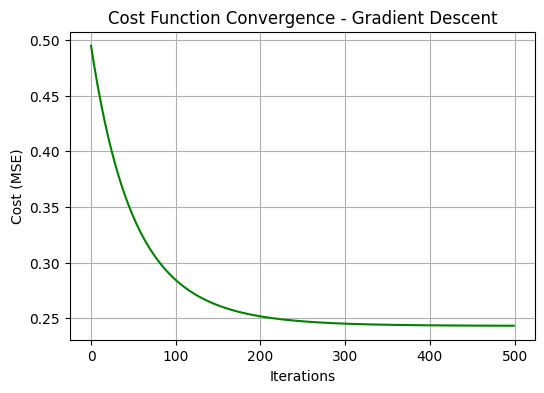

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence - Gradient Descent')
plt.grid(True)
plt.show()

In [ ]:
sample = np.array([[5, 6, 20, 3]])   # example input (MedInc, AveRooms, HouseAge, AveOccup)
sample_scaled = scaler_X.transform(sample)
sample_scaled = np.c_[np.ones((1, 1)), sample_scaled]
pred_scaled = sample_scaled.dot(theta_final)
predicted_price = scaler_y.inverse_transform(pred_scaled)

print(f"\n🏠 Predicted House Price (in $100,000s): {predicted_price[0][0]:.2f}")


🏠 Predicted House Price (in $100,000s): 2.40
